## Exercicis d'anàlisi de sentiment i textos.

# Exercici 1
Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.



In [2]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

# Tokenization

### Sentence tokenization

In [5]:
from nltk.tokenize import sent_tokenize
text = """People say sometimes that beauty is only superficial. That may be so, but at least it is not so superficial as thought is. 
To me, beauty is the wonder of wonders. It is only shallow people who do not judge by appearances"""
tokenized_text = sent_tokenize(text)
print(tokenized_text)

['People say sometimes that beauty is only superficial.', 'That may be so, but at least it is not so superficial as thought is.', 'To me, beauty is the wonder of wonders.', 'It is only shallow people who do not judge by appearances']


### Word Tokenization

In [6]:
from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(text)
print(tokenized_word)

['People', 'say', 'sometimes', 'that', 'beauty', 'is', 'only', 'superficial', '.', 'That', 'may', 'be', 'so', ',', 'but', 'at', 'least', 'it', 'is', 'not', 'so', 'superficial', 'as', 'thought', 'is', '.', 'To', 'me', ',', 'beauty', 'is', 'the', 'wonder', 'of', 'wonders', '.', 'It', 'is', 'only', 'shallow', 'people', 'who', 'do', 'not', 'judge', 'by', 'appearances']


In [7]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 35 samples and 47 outcomes>


In [8]:
# The three most repeated tokens
fdist.most_common(3)

[('is', 5), ('.', 3), ('beauty', 2)]

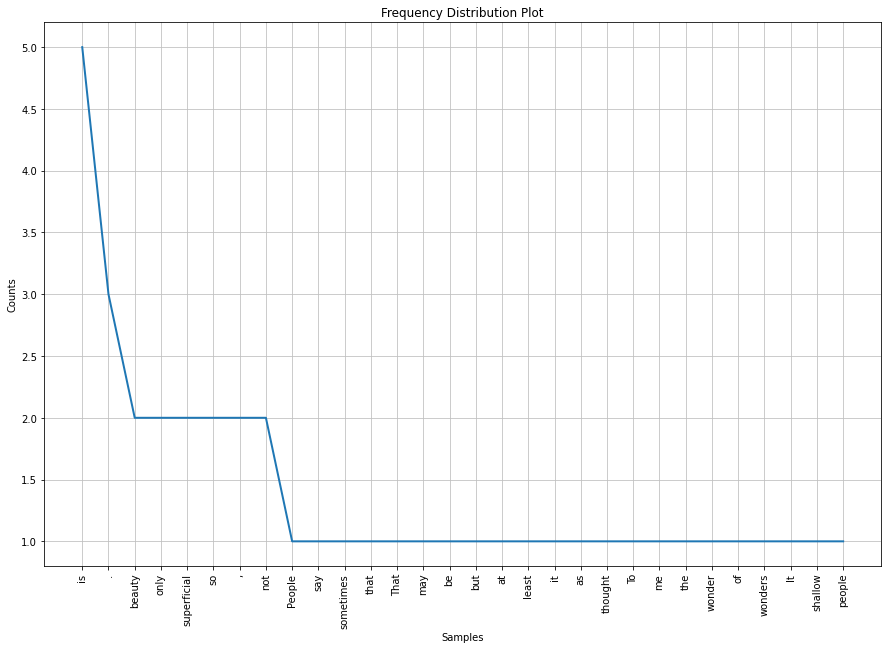

In [9]:
plt.figure(figsize=(15,10))

fdist.plot(30, cumulative=False, title='Frequency Distribution Plot')

In the plot above we see the frecuency of all the tokenized words.

# Exercici 2
Treu les stopwords i realitza stemming al teu conjunt de dades.



In [10]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'own', 'they', 'being', 're', 'doesn', 'themselves', 'me', 'weren', 'will', 'about', "that'll", 'or', 'above', 'once', 'ma', 'was', "needn't", 'who', "won't", "hadn't", 'below', 'didn', 'again', 'other', 'hasn', 'ourselves', 'such', "don't", 's', "it's", 'couldn', 'does', 'before', "couldn't", 'each', 'now', "mightn't", 'these', 'of', 'theirs', 'when', 've', "you're", "you've", 'he', 'because', 'very', 'should', 'not', "wouldn't", 'her', "should've", 'itself', "shouldn't", 'then', 'no', 'our', 'same', 'mustn', 'been', 'their', 'shouldn', 'after', 'do', 'him', 'further', 'few', 'can', 'wouldn', 'as', "isn't", 'my', 'on', 'to', 'yourself', 'a', 'but', 'she', 'you', 'shan', 'isn', 'and', 'i', 'has', 'how', 'your', 'too', 'it', 'until', 'than', 'by', 'through', "wasn't", "you'd", 'herself', 'its', 'here', 'we', 'd', 'hadn', 'nor', 'under', "hasn't", 'yourselves', 'where', 'm', 'only', 'himself', 'why', 'off', 'them', 'both', 'against', 'at', 'if', 'what', 'aren', 'don', 'out', 'had', 'mos

In [11]:
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_word)
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['People', 'say', 'sometimes', 'that', 'beauty', 'is', 'only', 'superficial', '.', 'That', 'may', 'be', 'so', ',', 'but', 'at', 'least', 'it', 'is', 'not', 'so', 'superficial', 'as', 'thought', 'is', '.', 'To', 'me', ',', 'beauty', 'is', 'the', 'wonder', 'of', 'wonders', '.', 'It', 'is', 'only', 'shallow', 'people', 'who', 'do', 'not', 'judge', 'by', 'appearances']
Filterd Sentence: ['People', 'say', 'sometimes', 'beauty', 'superficial', '.', 'That', 'may', ',', 'least', 'superficial', 'thought', '.', 'To', ',', 'beauty', 'wonder', 'wonders', '.', 'It', 'shallow', 'people', 'judge', 'appearances']


## Stemming
We are going to reduce the number of words by the word to their root word 

In [12]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

stemmed_words=[]
for i in filtered_sent:
  stemmed_words.append(ps.stem(i))

print("Filtered Sentence: ", filtered_sent)
print("Stemmed Words: ", stemmed_words)

Filtered Sentence:  ['People', 'say', 'sometimes', 'beauty', 'superficial', '.', 'That', 'may', ',', 'least', 'superficial', 'thought', '.', 'To', ',', 'beauty', 'wonder', 'wonders', '.', 'It', 'shallow', 'people', 'judge', 'appearances']
Stemmed Words:  ['peopl', 'say', 'sometim', 'beauti', 'superfici', '.', 'that', 'may', ',', 'least', 'superfici', 'thought', '.', 'to', ',', 'beauti', 'wonder', 'wonder', '.', 'it', 'shallow', 'peopl', 'judg', 'appear']


# Exercici 3
Realitza sentiment analysis al teu conjunt de dades.



In [13]:
doc0 = tokenized_text[0]
doc1 = tokenized_text[1]
doc2 = tokenized_text[2]
doc3 = tokenized_text[3]

In [14]:
tokenized_text

['People say sometimes that beauty is only superficial.',
 'That may be so, but at least it is not so superficial as thought is.',
 'To me, beauty is the wonder of wonders.',
 'It is only shallow people who do not judge by appearances']

In [20]:
from nltk.sentiment import SentimentIntensityAnalyzer as sia

sia = sia()
print(doc0)
print(sia.polarity_scores(doc0))
print(doc1)
print(sia.polarity_scores(doc1))
print(doc2)
print(sia.polarity_scores(doc2))
print(doc3)
print(sia.polarity_scores(doc3))

People say sometimes that beauty is only superficial.
{'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'compound': 0.5859}
That may be so, but at least it is not so superficial as thought is.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
To me, beauty is the wonder of wonders.
{'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'compound': 0.5859}
It is only shallow people who do not judge by appearances
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


We see that we have the hightest ponderation in neutral category althought the first and the thirst sentence has also a positive component, which is something that we can agree.  